# Exploring the simulation results

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

## Prepare the data

In [2]:
# df_nan = pd.read_hdf('results/run_grid_5_nan.hdf')
# df_notnan = pd.read_hdf('results/run_grid_5_notnan.hdf')
# df = pd.concat([df_nan, df_notnan])

df = pd.read_hdf('results/run_grid_6.hdf')

# df = pd.read_hdf('results/run_new_parallel.hdf')
# df = pd.read_hdf('results/run_prec_exp.hdf')


df

,width,height,speed,lego_count,precision,exploration,coordination,responsiveness,relevance,repeats,max_iter,goal_distance,parent_satisfaction,infant_satisfaction
0,300,300,2,4,20.0,0.0,0.0,0.0,0.000000,100,5000,"[119.65165336092566, 119.65165336092566, 119.4...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,300,300,2,4,20.0,0.0,0.0,0.0,33.333333,100,5000,"[125.33208712078572, 125.33208712078572, 125.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,300,300,2,4,20.0,0.0,0.0,0.0,66.666667,100,5000,"[127.33630234158039, 127.33630234158039, 127.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,300,300,2,4,20.0,0.0,0.0,0.0,100.000000,100,5000,"[129.03027038495821, 129.03027038495821, 128.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,300,300,2,4,20.0,0.0,0.0,20.0,0.000000,100,5000,"[118.74236846399577, 118.74236846399577, 118.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,300,300,2,4,100.0,100.0,100.0,80.0,100.000000,100,5000,"[128.28305460502824, 128.28305460502824, 128.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2996,300,300,2,4,100.0,100.0,100.0,100.0,0.000000,100,5000,"[120.50974192369694, 120.50974192369694, 120.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2997,300,300,2,4,100.0,100.0,100.0,100.0,33.333333,100,5000,"[127.53778122502341, 127.53778122502341, 127.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2998,300,300,2,4,100.0,100.0,100.0,100.0,66.666667,100,5000,"[122.87450179499639, 122.87450179499639, 122.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Add new column, which determines if the run was successful and if so - in how many steps the goal has been achieved

In [3]:
def get_success_step(dists, success_dist):
    try:
        return np.where(dists < success_dist)[0][0]
    except IndexError:
        return np.NaN

success_dist = 40

df['success_steps'] = df.apply(lambda row: get_success_step(row['goal_distance'], 40), axis=1)
df.sort_values(by=['success_steps']).head(40)

,width,height,speed,lego_count,precision,exploration,coordination,responsiveness,relevance,repeats,max_iter,goal_distance,parent_satisfaction,infant_satisfaction,success_steps
2396,300,300,2,4,80.0,100.0,100.0,100.0,0.000000,100,5000,"[119.76569558913037, 119.76569558913037, 119.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",370.0
2036,300,300,2,4,80.0,25.0,100.0,100.0,0.000000,100,5000,"[123.65016002089239, 123.65016002089239, 123.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",371.0
2156,300,300,2,4,80.0,50.0,100.0,100.0,0.000000,100,5000,"[120.46625407634774, 120.46625407634774, 120.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",385.0
2276,300,300,2,4,80.0,75.0,100.0,100.0,0.000000,100,5000,"[127.66748688802973, 127.66748688802973, 127.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",390.0
2032,300,300,2,4,80.0,25.0,100.0,80.0,0.000000,100,5000,"[131.62478331376113, 131.62478331376113, 131.4...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",423.0
2392,300,300,2,4,80.0,100.0,100.0,80.0,0.000000,100,5000,"[128.1402808873651, 128.1402808873651, 127.923...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",427.0
1796,300,300,2,4,60.0,100.0,100.0,100.0,0.000000,100,5000,"[125.4629951950712, 125.4629951950712, 125.203...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",428.0
2996,300,300,2,4,100.0,100.0,100.0,100.0,0.000000,100,5000,"[120.50974192369694, 120.50974192369694, 120.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",430.0
2152,300,300,2,4,80.0,50.0,100.0,80.0,0.000000,100,5000,"[124.50406015521608, 124.50406015521608, 124.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",431.0
2397,300,300,2,4,80.0,100.0,100.0,100.0,33.333333,100,5000,"[119.79162629131255, 119.79162629131255, 119.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",435.0


In [114]:
# df[df['success_steps'].isna() ].to_hdf('results/run_grid_5_nan.hdf', 'hdfkey')
# df[df['success_steps'].notna() ].to_hdf('results/run_grid_5_notnan.hdf', 'hdfkey')

/tmp/ipykernel_106633/893070050.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['goal_distance', 'parent_satisfaction', 'infant_satisfaction'], dtype='object')]

  df[df['success_steps'].isna() ].to_hdf('results/run_grid_5_nan.hdf', 'hdfkey')
/tmp/ipykernel_106633/893070050.py:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['goal_distance', 'parent_satisfaction', 'infant_satisfaction'], dtype='object')]

  df[df['success_steps'].notna() ].to_hdf('results/run_grid_5_notnan.hdf', 'hdfkey')


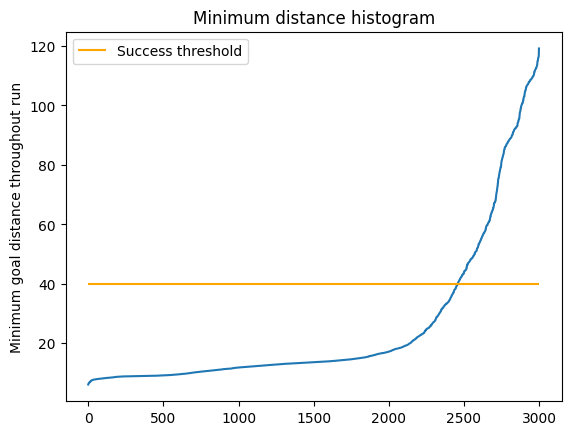

In [106]:
y = df.apply(lambda row: np.min(row['goal_distance']), axis=1).sort_values().to_numpy()

fig, ax = plt.subplots()
ax.plot(y)
ax.set_title('Minimum distance histogram')
ax.set_ylabel('Minimum goal distance throughout run')
ax.hlines(y=success_dist, xmin=0, xmax=len(y), color='orange', label='Success threshold')
ax.legend()
plt.show()

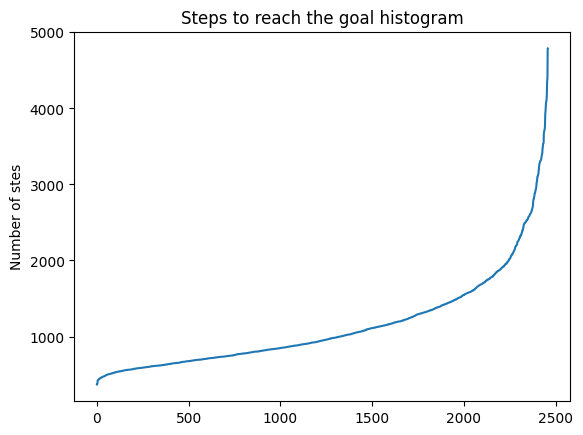

In [107]:
y = df[df['success_steps'].notna()].apply(lambda row: np.min(row['success_steps']), axis=1).sort_values().to_numpy()

fig, ax = plt.subplots()
ax.plot(y)
ax.set_title('Steps to reach the goal histogram')
ax.set_ylabel('Number of stes')
plt.show()

In [4]:
def moving_average(a, n=3):
    # Add zeros at the beginning, so the result doesn't change dimensions
    a = np.concatenate([([0] * (n - 1)), a])

    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def visualize_run(run, average_steps=500):
    x = list(range(run['max_iter']))

    step_stats = run['goal_distance']
    parent_stats = run['parent_satisfaction']
    infant_stats = run['infant_satisfaction']

    parent_stats = moving_average(parent_stats, average_steps)
    infant_stats = moving_average(infant_stats, average_steps)

    fig, ax1 = plt.subplots(figsize=(8, 5))

    ax1.plot(x, step_stats, color='r')
    ax1.set_ylim(bottom=0, top=150)
    ax1.set_ylabel('goal distance')
    ax1.set_xlabel('step')

    title = f'\
lego={run["lego_count"]}, prec={run["precision"]:.1f}, exp={run["exploration"]:.1f},\
coord={run["coordination"]:.1f}, resp={run["responsiveness"]:.1f}, rel={run["relevance"]:.1f},\
avg for {run["repeats"]} runs\
    '
    ax1.set_title(title)

    ax2 = ax1.twinx()
    ax2.plot(x, parent_stats, color='b')
    ax2.set_ylabel('satisfaction')

    ax2.plot(x, infant_stats, color='orange')
    ax2.legend(['parent', 'infant'])
    ax2.set_ylim(bottom=0)

    ax2.axvline(x=average_steps - 1, color='grey', label='axvline - full height')

    fig.tight_layout()
    # plt.savefig(f'../../plots/big_{current_param}.png', dpi=300)
    plt.show()

In [25]:
df.sort_values(by=['success_steps']).head(30)

,width,height,speed,lego_count,precision,exploration,coordination,responsiveness,relevance,repeats,max_iter,goal_distance,parent_satisfaction,infant_satisfaction,success_steps
2396,300,300,2,4,80.0,100.0,100.0,100.0,0.000000,100,5000,"[119.76569558913037, 119.76569558913037, 119.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",370.0
2036,300,300,2,4,80.0,25.0,100.0,100.0,0.000000,100,5000,"[123.65016002089239, 123.65016002089239, 123.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",371.0
2156,300,300,2,4,80.0,50.0,100.0,100.0,0.000000,100,5000,"[120.46625407634774, 120.46625407634774, 120.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",385.0
2276,300,300,2,4,80.0,75.0,100.0,100.0,0.000000,100,5000,"[127.66748688802973, 127.66748688802973, 127.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",390.0
2032,300,300,2,4,80.0,25.0,100.0,80.0,0.000000,100,5000,"[131.62478331376113, 131.62478331376113, 131.4...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",423.0
2392,300,300,2,4,80.0,100.0,100.0,80.0,0.000000,100,5000,"[128.1402808873651, 128.1402808873651, 127.923...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",427.0
1796,300,300,2,4,60.0,100.0,100.0,100.0,0.000000,100,5000,"[125.4629951950712, 125.4629951950712, 125.203...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",428.0
2996,300,300,2,4,100.0,100.0,100.0,100.0,0.000000,100,5000,"[120.50974192369694, 120.50974192369694, 120.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",430.0
2152,300,300,2,4,80.0,50.0,100.0,80.0,0.000000,100,5000,"[124.50406015521608, 124.50406015521608, 124.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",431.0
2397,300,300,2,4,80.0,100.0,100.0,100.0,33.333333,100,5000,"[119.79162629131255, 119.79162629131255, 119.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",435.0


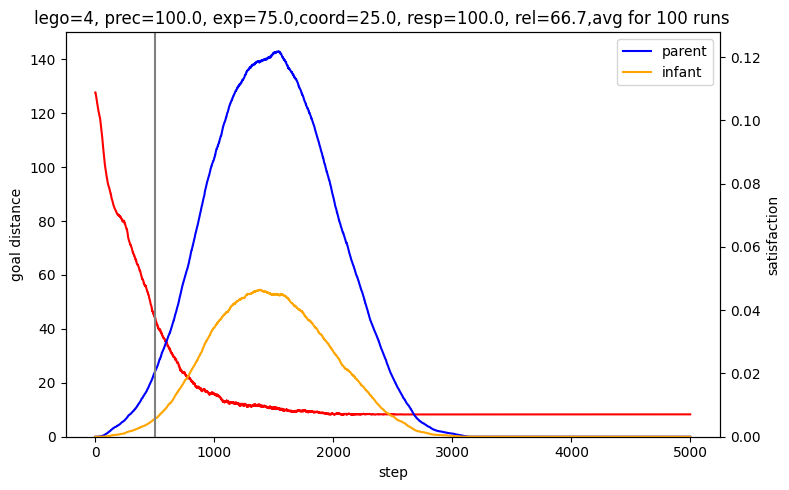

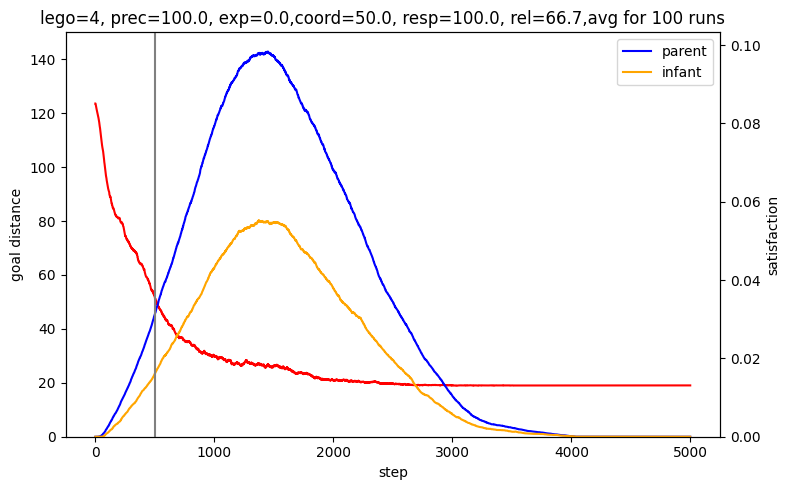

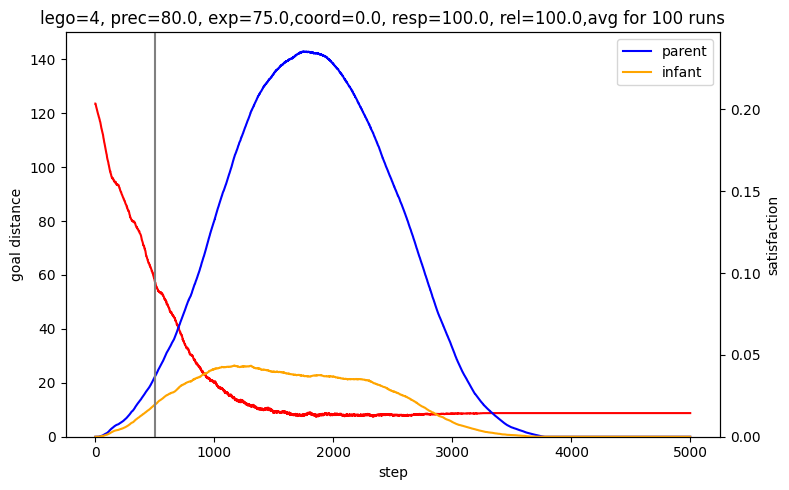

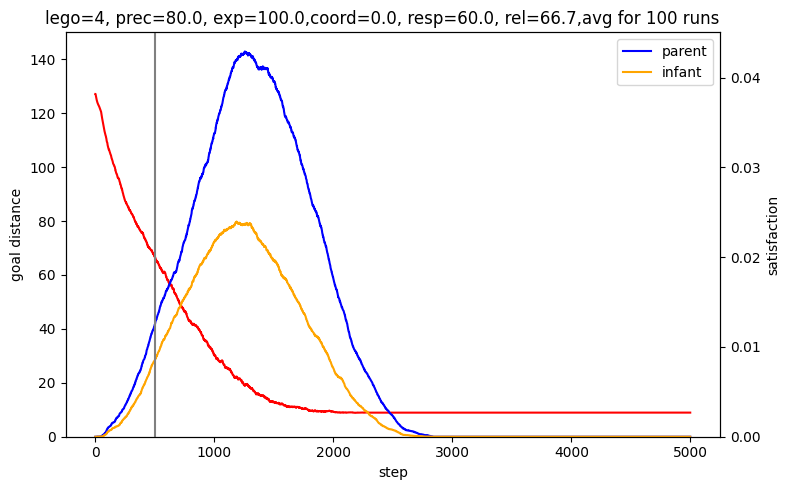

In [5]:
random_runs = np.random.choice(range(len(df)), size=4, replace=False)
for r in random_runs:
    visualize_run(df.loc[r, :], average_steps=500)

## Create heatmap for 2 variables
Find 3 paramters which change the least in the top runs and free the remaining two

In [51]:
top_runs_no = 30

top_runs = df.sort_values(by=['success_steps']).head(top_runs_no)

params_data = []

for param in ['precision', 'exploration', 'relevance', 'responsiveness', 'coordination']:
    bincount = np.bincount(top_runs[param])
    count = np.max(bincount)
    value = np.argmax(bincount)

    params_data.append([param, value, count])

params_df = pd.DataFrame(params_data, columns=['param', 'best_value', 'count']).sort_values('count', ascending=False)
print(params_df)
fixed_params = params_df.head(3).loc[:, ['param', 'best_value']].to_numpy().reshape(6)
free_params = params_df.tail(2).loc[:, ['param', 'best_value']].to_numpy().reshape(4)

p1, v1, p2, v2, p3, v3 = fixed_params
param1, val1, param2, val2 = free_params

selected_runs = df[ (df[p1] == v1) & (df[p2] == v2) & (df[p3] == v3)]
selected_runs = selected_runs.sort_values(by=[param1, param2])
selected_runs

            param  best_value  count
4    coordination         100     27
2       relevance           0     25
0       precision          80     19
3  responsiveness         100     16
1     exploration         100     11


,width,height,speed,lego_count,precision,exploration,coordination,responsiveness,relevance,repeats,max_iter,goal_distance,parent_satisfaction,infant_satisfaction,success_steps
1896,300,300,2,4,80.0,0.0,100.0,0.0,0.0,100,5000,"[124.98858381777889, 124.98858381777889, 124.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1028.0
2016,300,300,2,4,80.0,25.0,100.0,0.0,0.0,100,5000,"[125.20925200514337, 125.20925200514337, 125.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",837.0
2136,300,300,2,4,80.0,50.0,100.0,0.0,0.0,100,5000,"[127.1029833649611, 127.1029833649611, 126.891...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",797.0
2256,300,300,2,4,80.0,75.0,100.0,0.0,0.0,100,5000,"[119.41972482531575, 119.41972482531575, 119.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",724.0
2376,300,300,2,4,80.0,100.0,100.0,0.0,0.0,100,5000,"[130.48840584897897, 130.48840584897897, 130.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",883.0
1900,300,300,2,4,80.0,0.0,100.0,20.0,0.0,100,5000,"[127.20369238215899, 127.20369238215899, 126.9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",733.0
2020,300,300,2,4,80.0,25.0,100.0,20.0,0.0,100,5000,"[130.484624174535, 130.484624174535, 130.25952...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",611.0
2140,300,300,2,4,80.0,50.0,100.0,20.0,0.0,100,5000,"[128.10473555972584, 128.10473555972584, 127.9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",596.0
2260,300,300,2,4,80.0,75.0,100.0,20.0,0.0,100,5000,"[127.9697888319347, 127.9697888319347, 127.799...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",581.0
2380,300,300,2,4,80.0,100.0,100.0,20.0,0.0,100,5000,"[125.59833898308332, 125.59833898308332, 125.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",564.0


In [43]:
selected_runs = df
selected_runs = selected_runs.sort_values(by=['precision', 'exploration'])
selected_runs

,width,height,speed,lego_count,precision,exploration,coordination,responsiveness,relevance,repeats,max_iter,goal_distance,parent_satisfaction,infant_satisfaction,success_steps
0,300,300,2,4,20.0,0.0,0.0,0.0,0.000000,100,5000,"[119.65165336092566, 119.65165336092566, 119.4...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
1,300,300,2,4,20.0,0.0,0.0,0.0,33.333333,100,5000,"[125.33208712078572, 125.33208712078572, 125.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
2,300,300,2,4,20.0,0.0,0.0,0.0,66.666667,100,5000,"[127.33630234158039, 127.33630234158039, 127.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
3,300,300,2,4,20.0,0.0,0.0,0.0,100.000000,100,5000,"[129.03027038495821, 129.03027038495821, 128.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
4,300,300,2,4,20.0,0.0,0.0,20.0,0.000000,100,5000,"[118.74236846399577, 118.74236846399577, 118.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4782.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,300,300,2,4,100.0,100.0,100.0,80.0,100.000000,100,5000,"[128.28305460502824, 128.28305460502824, 128.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",585.0
2996,300,300,2,4,100.0,100.0,100.0,100.0,0.000000,100,5000,"[120.50974192369694, 120.50974192369694, 120.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",430.0
2997,300,300,2,4,100.0,100.0,100.0,100.0,33.333333,100,5000,"[127.53778122502341, 127.53778122502341, 127.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",513.0
2998,300,300,2,4,100.0,100.0,100.0,100.0,66.666667,100,5000,"[122.87450179499639, 122.87450179499639, 122.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",498.0


In [56]:
root = int(np.sqrt(len(selected_runs)))
hm_data = selected_runs['success_steps'].to_numpy().reshape(6, 5).T
# hm_data = np.nan_to_num(hm_data, nan=5001)
print(hm_data.shape)
hm_data

(5, 6)


array([[1028.,  733.,  583.,  544.,  478.,  461.],
       [ 837.,  611.,  460.,  452.,  423.,  371.],
       [ 797.,  596.,  513.,  446.,  431.,  385.],
       [ 724.,  581.,  463.,  463.,  475.,  390.],
       [ 883.,  564.,  475.,  458.,  427.,  370.]])

6
5


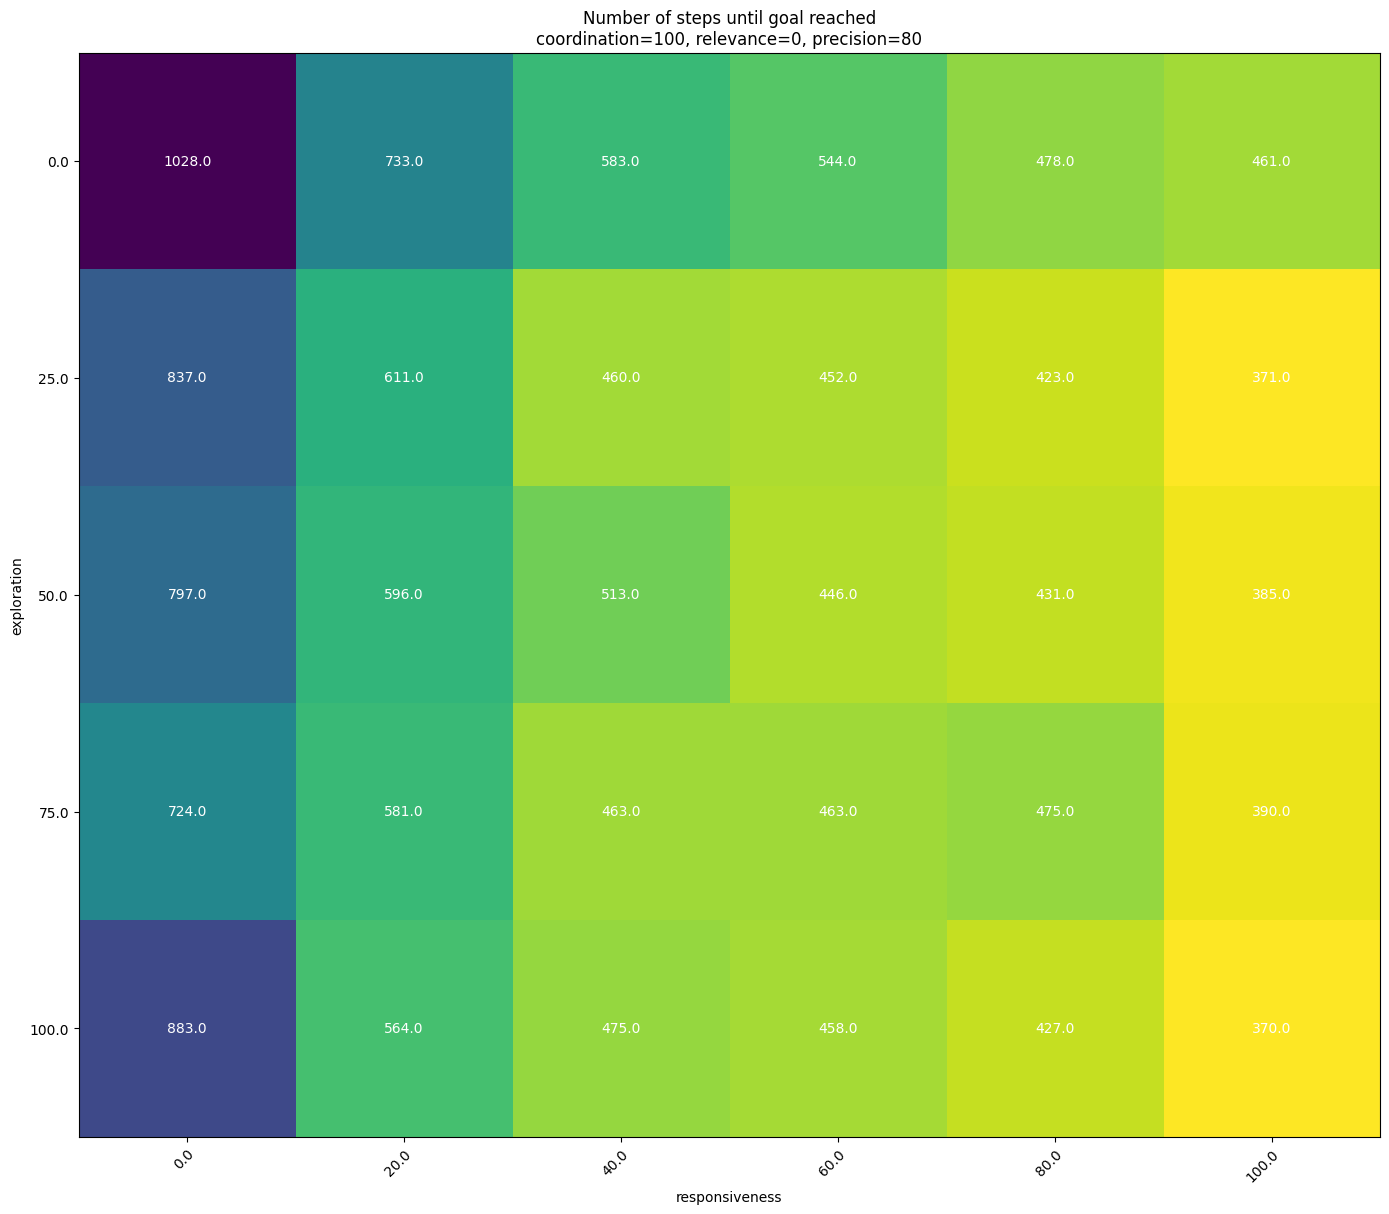

In [60]:
labels1 = selected_runs[param1].unique().round()
labels2 = selected_runs[param2].unique().round()

colormap_data = np.nan_to_num(hm_data, nan=(np.nanmax(hm_data) + 100))

fig, ax = plt.subplots(figsize=(14, 14))
im = ax.imshow(colormap_data, cmap=matplotlib.colormaps['viridis_r'])

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(labels1)), labels=labels1)
ax.set_yticks(np.arange(len(labels2)), labels=labels2)

ax.set_xlabel(param1)
ax.set_ylabel(param2)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

print(len(labels1))
print(len(labels2))

# Loop over data dimensions and create text annotations.
for i in range(len(labels1)):
    for j in range(len(labels2)):
        # print(i, j)
        text = ax.text(i, j, hm_data[j, i], ha="center", va="center", color="w")

ax.set_title(f'Number of steps until goal reached\n{p1}={v1}, {p2}={v2}, {p3}={v3}')
fig.tight_layout()
plt.show()